In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("loan_data.csv")

In [41]:
df.shape

(50000, 16)

Let's just get a quick look at the data

In [42]:
df.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


The dataset is only numerical, there are lot of variables - so it is going to be necessary to find those that are the most useful

In [43]:
df.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


All the variables seem to be normal, no unreasonable values. Now let's check quickly for missing values : i asked AI "give me the panda code to check for missing values"

In [44]:
df.isnull().sum()

,0
age,0
years_employed,0
annual_income,0
credit_score,0
credit_history_years,0
savings_assets,0
current_debt,0
defaults_on_file,0
delinquencies_last_2yrs,0
derogatory_marks,0


the code seems to have worked - there are all the different variables and they all seem to be at 0 missing values

The Y value - the one we are gonna try and explain - is loan_status, so looking at this let's look if there are any variables that i don't think are useful. There don't seem to be any useless variables like a potential ID column

Now let's seperate X and Y

In [45]:
Y_values = df[['loan_status']].values.ravel()
X_values = df.drop(['loan_status'], axis=1)

I asked Ai how can i check this worked :

In [46]:
print(X_values.shape)
print(Y_values.shape)

(50000, 15)
(50000,)


In [47]:
X_values.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522


This seems to have worked since there isn't the Y value = loan_status

In [48]:
Y_values[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

This seems to be correct since loan_status is binary

Now let's scale the data : using the code from the github

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values.head()


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627


All of the values seem to be between 0.0 and 1 to just make sure we're gonna use the describe function to check the min and max

In [50]:
X_values.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.326097,0.186839,0.149204,0.588874,0.272276,0.011985,0.087151,0.053480,0.061627,0.036910,0.327054,0.558741,0.355544,0.348218,0.347884
std,0.213819,0.190779,0.138853,0.128947,0.240252,0.044108,0.081109,0.224991,0.093894,0.103249,0.262474,0.239291,0.200234,0.233712,0.233837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.032581,0.052257,0.501992,0.066667,0.000433,0.033812,0.000000,0.000000,0.000000,0.118593,0.363529,0.199248,0.163071,0.162651
50%,0.326923,0.122807,0.113223,0.587649,0.203333,0.001893,0.063233,0.000000,0.000000,0.000000,0.257286,0.555294,0.329574,0.308078,0.307229
75%,0.480769,0.285714,0.203078,0.675299,0.420000,0.007570,0.112621,0.000000,0.111111,0.000000,0.482412,0.757059,0.484962,0.502885,0.503012
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The min are all 0 and the max are all 1 - so the scalling worked

Now let's split the data between test and train - let's use the github code

In [51]:
# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_values,
    Y_values,
    test_size = 0.2,
    random_state=1984,
    stratify=Y_values
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(40000, 15)
(10000, 15)
(40000,)
(10000,)


So this means that to train we have 40000 random values and 15 features and to test we have 10000 and 15 features, which is good since we want all are data to be trained on all the 15 features of the data set. The last two rows also shows that there are all the the rows since there are the 40000 labels for Y-train and 10000 for Y-test

I asked AI - how can i check that the split happened correctly

Told me to check that the row counts match

In [52]:
len(X_train) == len(Y_train)
len(X_test) == len(Y_test)


True

This shows "true" - which means that no rows were lost or misaligned

Next check that the features match train and test

In [53]:
print(X_train.shape[1] == X_test.shape[1])


True


"true" means that both sets have the same 15 features

Then check that the split proportions are correct

In [54]:
len(X_test) / len(df)


0.2

This shows 0.2 - which is what it should be sice the test set should be 20% of the whole dataset

Finally, since the Y value is binary we want to check that the split happened with stratiication - i asked ai to give me the code for this

In [55]:
import numpy as np

print("Full dataset:")
print(np.bincount(Y_values))

print("Train set:")
print(np.bincount(Y_train))

print("Test set:")
print(np.bincount(Y_test))

Full dataset:
[22477 27523]
Train set:
[17982 22018]
Test set:
[4495 5505]


This tells me the amount of 0 and 1's in the full dataset, the train set and the test set - but i want the proportions - so i asked Ai to give me the code to get the proportions

In [56]:
import numpy as np

# Count of each class (0 and 1)
print("Full dataset counts:", np.bincount(Y_values))
print("Train set counts:", np.bincount(Y_train))
print("Test set counts:", np.bincount(Y_test))

# Now calculate proportions
full_prop = np.bincount(Y_values) / len(Y_values)
train_prop = np.bincount(Y_train) / len(Y_train)
test_prop = np.bincount(Y_test) / len(Y_test)

print("\nClass proportions:")
print("Full dataset proportions:", full_prop)
print("Train set proportions:", train_prop)
print("Test set proportions:", test_prop)


Full dataset counts: [22477 27523]
Train set counts: [17982 22018]
Test set counts: [4495 5505]

Class proportions:
Full dataset proportions: [0.44954 0.55046]
Train set proportions: [0.44955 0.55045]
Test set proportions: [0.4495 0.5505]


This shows me that the proportions are very close - which shows that the stratification worked

Next step, is that we want to build a baseline model - i asked Ai the code to create a logitsic regression for the dataset

In [57]:
from sklearn.linear_model import LogisticRegression as LogR

# 1. Create the algorithm object (not yet trained)
logR_model = LogR(
    penalty='l2',       # use L2 regularisation (Ridge)
    solver='liblinear', # good solver for small/medium datasets, supports L2
    max_iter=1000       # allow more iterations so it can converge
)

# 2. Fit (train) the model on training data
logR_model.fit(X_train, Y_train)

# 3. Predict on unseen test data
logR_pred = logR_model.predict(X_test)


Okay now still on the regression model, to check that the code worked and see if it was efficient-  i want to evaluate it - I asked AI to give me the code to evalaute the accuracy, the macro precision, the macro recall and the macro F1 and the confusion matrix of the logistic regression model

=== Logistic Regression ===
Accuracy: 0.841
Macro Precision: 0.84
Macro Recall: 0.838
Macro F1: 0.839


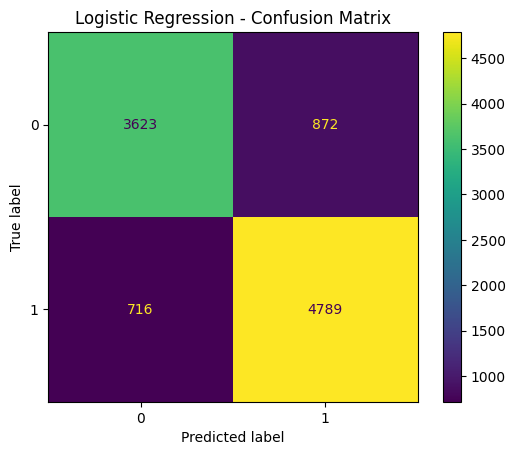

In [58]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
print("=== Logistic Regression ===")

# Accuracy
logR_acc = accuracy_score(Y_test, logR_pred)

# Macro precision, recall, F1
logR_prec, logR_rec, logR_f1, _ = precision_recall_fscore_support(
    Y_test, logR_pred, average='macro'
)

print("Accuracy:", round(logR_acc, 3))
print("Macro Precision:", round(logR_prec, 3))
print("Macro Recall:", round(logR_rec, 3))
print("Macro F1:", round(logR_f1, 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, logR_pred)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


First all of the evaluations worked so the logistic regression worked
Let's evaluate this :

* Acurracy : the model is correct 84.1% of the time.
* Macro Precision : On average, when the model predicts a class of (àor 1), 84% of those predictions are correct, this shows high precision, which means that the model rarely approves someone who will default
* Macro Recall : On average, the model correctly finds 83.8% of all real 0's and 1's, which is good because it catches risky borrowers while not rejecting too many safe borrowers
* Macro F1 reflects how stable and reliable the model is across bot classes, 0.839 is solid for a first model
* Confusion Matrix : The model correctly identified 3623 risky borrowers however it approved 872 risky borrowers who will likely default : this means that the model is a bid too optimistic for some bad borrowers. The model also rejected 716 good borrowers, which means they lost potential profit but it less risky for a bank. The model correctly approved 4789 good borrowers.


Logistic Regression performs solidly with 84% accuracy and balanced macro metrics, but its key weakness is the 872 false positives, approving risky customers which a more advanced model like Random Forest or GBDT may handle better.






Let's move onto another model, to see if it fits better, i asked Ai to give me the code for a decision tree for a database machine learning program

In [59]:
from sklearn.tree import DecisionTreeClassifier as DTC

# 1. Create a basic tree (no hyperparameters yet)
dt_model = DTC(
    random_state=1984  # for reproducibility of the tree structure
)

# 2. Train the tree
dt_model.fit(X_train, Y_train)

# 3. Predict on test data
dt_pred = dt_model.predict(X_test)


I asked Ai to give me the code to see what the tree looks like to check if the code has worked

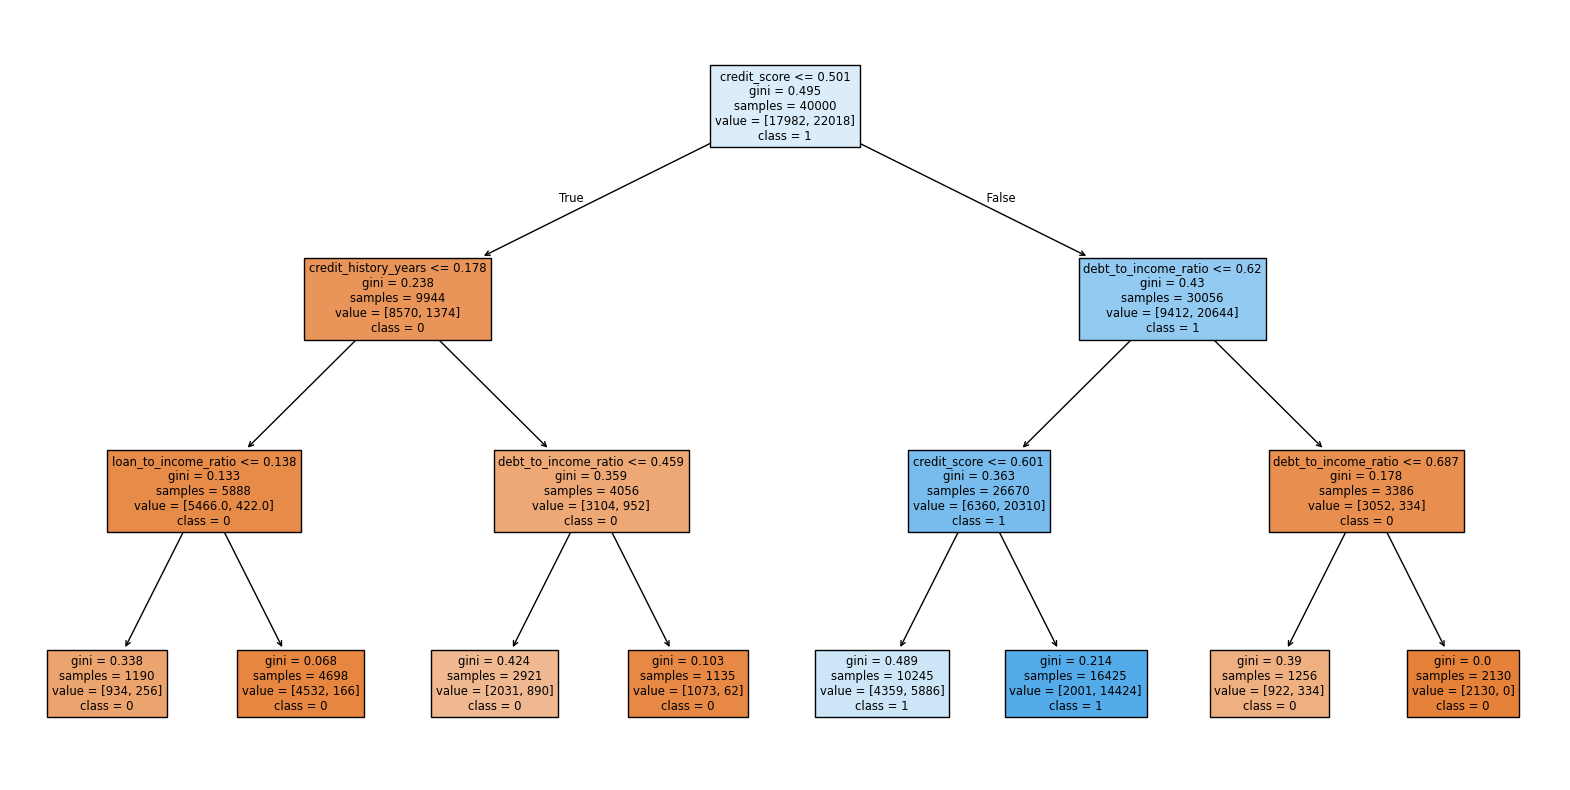

In [60]:
from sklearn.tree import plot_tree

# small tree just to visualise (max_depth=3)
dt_small = DTC(max_depth=3, random_state=1984)
dt_small.fit(X_train, Y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    dt_small,
    filled=True,
    feature_names=X_train.columns,
    class_names=['0', '1']
)
plt.show()


Now that we've checked it has worked : let's evaluate the decision tree model

=== Decision Tree ===
Accuracy: 0.835
Macro Precision: 0.833
Macro Recall: 0.833
Macro F1: 0.833


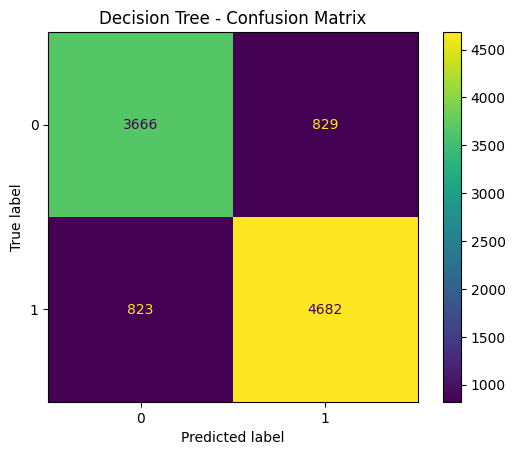

In [61]:
print("=== Decision Tree ===")

dt_acc = accuracy_score(Y_test, dt_pred)
dt_prec, dt_rec, dt_f1, _ = precision_recall_fscore_support(
    Y_test, dt_pred, average='macro'
)

print("Accuracy:", round(dt_acc, 3))
print("Macro Precision:", round(dt_prec, 3))
print("Macro Recall:", round(dt_rec, 3))
print("Macro F1:", round(dt_f1, 3))

# 5. Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, dt_pred)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Let's Evaluate :
* Accuracy : The model is correct 83.5% of the time, which is slightly worse than the Logitsic Regression which indicates that the tree is not performing as well
* Macro Precision : On average, 83.3% of predicted positives/negatives are correct, which is slightly lower than logistic regession
* Macro Recall : The model identifies 83.3% of real 0's and 1's, which is again slightly worse than LR
* Macro F1 value is at 83.3% which is again less than LR which tells us that the tree is a bit less stable/ predictive

*  The confusion Matrix : The tree correctly rejected 3666 risky borrowers which is slightly more than the LR. The tree approved 829 borrowers who were actually risy, LR had 872 so the tree did better which means that the decision tree is slightly safer in terms of wrongly approving bad loans. The tree rejected 823 borrowers who  were actually good, which is worse than LR, meaning that the tree is more conservative and rejects more people unnecessarily. The tree correctly approved 2682 good borrowers which is lower than LR, which means that the decision tree approves fewer good loans


The Decision Tree performs slightly worse than Logistic Regression across all major metrics (accuracy, macro precision, recall, and F1).
Although it produces fewer false positives — making it somewhat safer by approving fewer risky borrowers. It also rejects significantly more good borrowers (higher false negatives).
Overall, the tree is more conservative but less accurate and less balanced, confirming that single decision trees tend to overfit and are usually outperformed by ensemble methods such as Random Forest or Gradient Boosting.

Next lt's try a new model : Random Forest. I asked AI to give me the code.

In [62]:
from sklearn.ensemble import RandomForestClassifier as RF

# 1. Create the forest
rf_model = RF(
    n_estimators=100,   # number of trees in the forest
    max_depth=None,     # trees can grow until leaves are pure or too small
    n_jobs=-1,          # use all CPU cores
    random_state=1984
)

# 2. Train it
rf_model.fit(X_train, Y_train)

# 3. Predict
rf_pred = rf_model.predict(X_test)


This shows me that a random fprest was created - it isn't used for interpretation though. Let's analyse aand evaluate our random forest

=== Random Forest ===
Accuracy: 0.884
Macro Precision: 0.884
Macro Recall: 0.882
Macro F1: 0.883


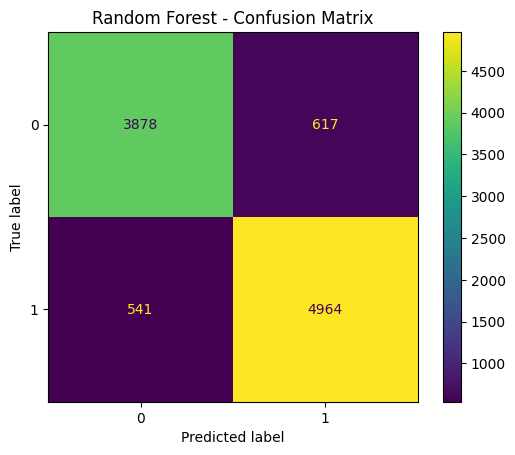

In [63]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

print("=== Random Forest ===")

# Accuracy
rf_acc = accuracy_score(Y_test, rf_pred)

# Macro Precision, Recall, F1
rf_prec, rf_rec, rf_f1, _ = precision_recall_fscore_support(
    Y_test, rf_pred, average='macro'
)

print("Accuracy:", round(rf_acc, 3))
print("Macro Precision:", round(rf_prec, 3))
print("Macro Recall:", round(rf_rec, 3))
print("Macro F1:", round(rf_f1, 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, rf_pred)
plt.title("Random Forest - Confusion Matrix")
plt.show()


Seeing as the evaluation metrics worked we can conform that the model was correctly created

* Accuracy : the model correctly predicts 88.4% of loans, which is the best accuracy so far
* Macro Precision : on average, 88.4% of predictions are correct, this precision is the best so far, which means fewer bad predictions
* Macro Recall : The model correctly identifies 88.2% of all real good and bad loans, which is a higher recall than previous models so it finds more real bad loans and approves more real good loans
* Macro F1 : Is the best result so far which indicates the model is both accurate and stable
* Confusion Matrix : It correctly rejected 3878 risky borrowers, approved 617 risky borrowers who should have been rejected, it wrongly rejected 541 good borrowers and correctly approved 4964 good borrowers. So through all of these this model is the best so far for all the fake positives, true positives, fake negatives and true negatives.

Random Forest significantly outperforms Logistic Regression and Decision Tree across every major metric. Additionally, it identifies the largest number of true positives and true negatives, making it both profitable and safe from a risk perspective.






Next, let's make a Gradient Boosted Decison tree model (GBDT), since it builds trees sequentially each one trying to fix the mistakes of the previous ones, i asked Ai for the code

In [64]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# 1. Create the GBDT model
gbdt_model = GBDT(
    n_estimators=100,   # number of small trees
    learning_rate=0.1,  # how much each tree corrects the previous one
    max_depth=3,        # make trees small/weak learners
    random_state=1984
)

# 2. Train
gbdt_model.fit(X_train, Y_train)

# 3. Predict
gbdt_pred = gbdt_model.predict(X_test)


Now let's evaluate

=== GBDT ===
Accuracy: 0.887
Macro Precision: 0.887
Macro Recall: 0.884
Macro F1: 0.886


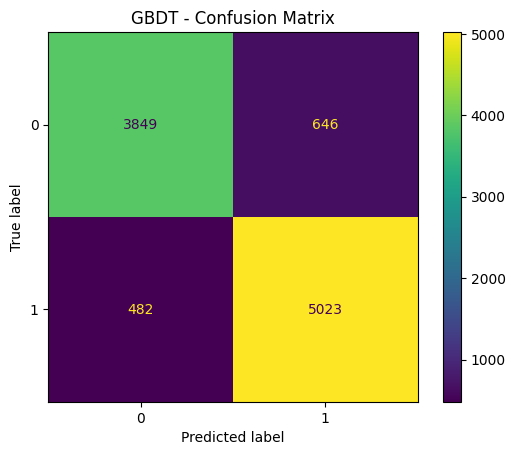

In [65]:
print("=== GBDT ===")

gbdt_acc = accuracy_score(Y_test, gbdt_pred)
gbdt_prec, gbdt_rec, gbdt_f1, _ = precision_recall_fscore_support(
    Y_test, gbdt_pred, average='macro'
)

print("Accuracy:", round(gbdt_acc, 3))
print("Macro Precision:", round(gbdt_prec, 3))
print("Macro Recall:", round(gbdt_rec, 3))
print("Macro F1:", round(gbdt_f1, 3))

ConfusionMatrixDisplay.from_predictions(Y_test, gbdt_pred)
plt.title("GBDT - Confusion Matrix")
plt.show()


The evaluation metrics seem correct which indicates that the model was created correctly
* Accuracy : The model is correct 88.7% of the time, which is slightly better than the random forest which indicates strong predictive power
* Macro Precision : On average, when the model predicts 0 or 1, 88.7% of those predictions are correct, which is the best prediction so far.
* Macro Recall : The model finds 88.4% of all the real good and bad loans, it misses fewer cases than previous cases
* Macro F1 : This is the best balance of precision and recall
* Confusion Matrix : The model correctly rejected 4=3849 bad borrowers, it approved 646 risky borrowers who should not have been approved, it rejected 482 good borrowers and correctly approved 5023 good borrowers.

The Gradient Boosted Decision Tree (GBDT) model delivers the strongest overall performance among all models evaluated.
Overall, GBDT provides the best trade-off between profitability (high TP, low FN) and risk control (low FP), making it the strongest model so far.




Next Let's move onto the last model : the XGBost (XGB), XGBoost is a fast, regularised version of gradient boosting. I asked AI to give me the code

In [66]:

from xgboost import XGBClassifier as XGB

# 1. Create XGBoost model
xgb_model = XGB(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # step size
    max_depth=3,           # tree depth
    subsample=0.8,         # use 80% of rows per tree
    colsample_bytree=0.8,  # use 80% of features per tree
    objective='binary:logistic', # output is probability for class 1
    eval_metric='logloss', # loss metric (required to suppress warnings)
    random_state=1984,
    n_jobs=-1
)

# 2. Train
xgb_model.fit(X_train, Y_train)

# 3. Predict (class labels)
xgb_pred = xgb_model.predict(X_test)


Now let's interpret this model

=== XGBoost ===
Accuracy: 0.892
Macro Precision: 0.893
Macro Recall: 0.889
Macro F1: 0.891


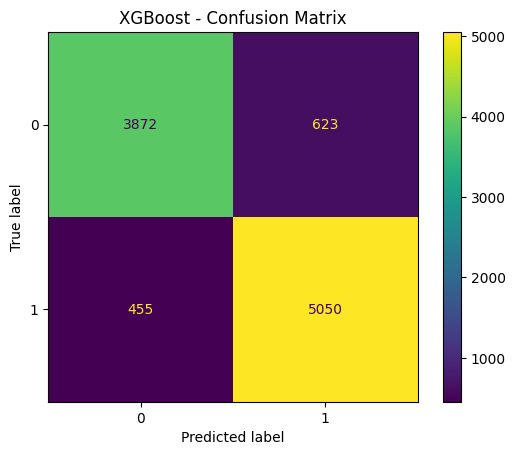

In [67]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("=== XGBoost ===")
xgb_acc = accuracy_score(Y_test, xgb_pred)
xgb_prec, xgb_rec, xgb_f1, _ = precision_recall_fscore_support(
    Y_test, xgb_pred, average='macro'
)

print("Accuracy:", round(xgb_acc, 3))
print("Macro Precision:", round(xgb_prec, 3))
print("Macro Recall:", round(xgb_rec, 3))
print("Macro F1:", round(xgb_f1, 3))

ConfusionMatrixDisplay.from_predictions(Y_test, xgb_pred)
plt.title("XGBoost - Confusion Matrix")
plt.show()


The evaluation metrics functionned correctly which indicates that the model was created correctly
* Accuracy : XGBoost is correct 89.2% of the time, this is the highest accuracy of all models so far
* Macro Precision : on average, 89.3% of predicted classes are correct, which is the best precision so far
* Macro Recall : The model finds 88.9% of real good and bad loans, this means that XGBoost catches more real good loans and more real bad loans
* Macro F1 : is the strongest indicator that XGBoost is the most stable, generalizable model
* Confusion Matrix : the model correctly rejected 3872 risky borrowers, almost identicak to GBDT, it approved 623 risky borrowers who should not be approved which is the second lowest false positive of all models, the model rejected 455 good borrowers which is the lowest accross all models, it correctly approved 5050 good borrowers which is the highest number of correct approvals

Overall, XGBoost provides the best trade-off between maximizing profit (high TP, low FN) and controlling credit risk (low FP). It is the clear winner among all models tested.







I asked AI if it could give me the code to summarize all the results

In [68]:
results = {
    "Logistic Regression": (logR_acc, logR_prec, logR_rec, logR_f1),
    "Decision Tree":       (dt_acc, dt_prec, dt_rec, dt_f1),
    "Random Forest":       (rf_acc, rf_prec, rf_rec, rf_f1),
    "GBDT":                (gbdt_acc, gbdt_prec, gbdt_rec, gbdt_f1),
    "XGBoost":             (xgb_acc, xgb_prec, xgb_rec, xgb_f1)
}

for name, (acc, prec, rec, f1) in results.items():
    print(f"=== {name} ===")
    print("Accuracy:", round(acc, 3))
    print("Macro Precision:", round(prec, 3))
    print("Macro Recall:", round(rec, 3))
    print("Macro F1:", round(f1, 3))
    print()


=== Logistic Regression ===
Accuracy: 0.841
Macro Precision: 0.84
Macro Recall: 0.838
Macro F1: 0.839

=== Decision Tree ===
Accuracy: 0.835
Macro Precision: 0.833
Macro Recall: 0.833
Macro F1: 0.833

=== Random Forest ===
Accuracy: 0.884
Macro Precision: 0.884
Macro Recall: 0.882
Macro F1: 0.883

=== GBDT ===
Accuracy: 0.887
Macro Precision: 0.887
Macro Recall: 0.884
Macro F1: 0.886

=== XGBoost ===
Accuracy: 0.892
Macro Precision: 0.893
Macro Recall: 0.889
Macro F1: 0.891



In conclusion, Among the five models tested, XGBoost achieved the highest macro F1-score and a favourable confusion matrix with fewer false positives (bad loans predicted as good). Given that false positives are particularly costly in lending, XGBoost is chosen as the final model.

However now we should tune the hyperparameters to get more accurate and fine models - to make sure there is no overfitting

First we need to import RandomizedSearchCV to be able to tune our model, and ignore the warning we are going to get - using the code from the github

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")


Next using the code from the github we are going to hyperparameter tune them and see the scores again (on training data):

In [70]:
from sklearn.linear_model import LogisticRegression as LogR

In [72]:
LogR_algo = LogR()
LogR_model = LogR_algo.fit(X_train, Y_train)

In [73]:
# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_

# Logistic Regression
LogR_tuned_parameters = {
    'solver': ['liblinear'], # only this one as it does both L1 and L2
    # C is the equivalent of alpha in L1/L2 regression - how much regularisation
    'C': uniform(loc=0.1, scale=19.9),  # Draw from a uniform distribution between 0.1 and 20
    'penalty': ['l1', 'l2', 'elasticnet', None] # elasticnet is a mix of L1 and L2
}

LogR_best_params = random_search(LogR_algo, LogR_tuned_parameters, X_train, Y_train)


In [1]:
# Train the models
LogR_algo = LogR(**LogR_best_params)
LogR_model = LogR_algo.fit(X_train, Y_train)


NameError: name 'LogR' is not defined

=== Tuned Logistic Regression ===
Accuracy: 0.842
Macro Precision: 0.841
Macro Recall: 0.838
Macro F1: 0.839


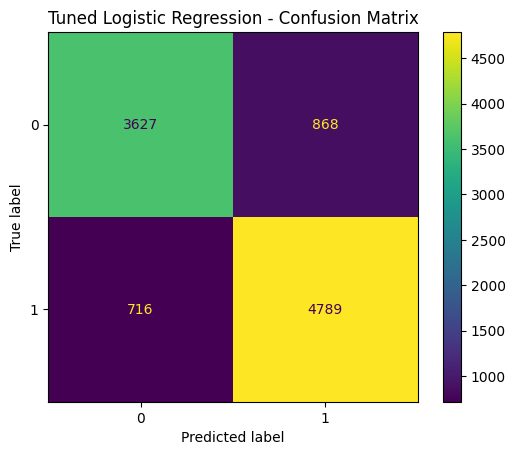

In [77]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

print("=== Tuned Logistic Regression ===")

# Make predictions using the tuned model
LogR_model_pred = LogR_model.predict(X_test)

# Accuracy
logR_acc = accuracy_score(Y_test, LogR_model_pred)

# Macro precision, recall, F1
logR_prec, logR_rec, logR_f1, _ = precision_recall_fscore_support(
    Y_test, LogR_model_pred, average='macro'
)

print("Accuracy:", round(logR_acc, 3))
print("Macro Precision:", round(logR_prec, 3))
print("Macro Recall:", round(logR_rec, 3))
print("Macro F1:", round(logR_f1, 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, LogR_model_pred)
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.show()
